Note: This Notebook severely modified the following notebook:

https://github.com/drckf/mlreview_notebooks/blob/master/jupyter_notebooks/notebooks/NB13_CIX-DNN_susy_Pytorch.ipynb


# **Neural Networks in High Energy Physics**

In this module we will be applying deep neural networks to the field of high energy physics. Specifically we will be classifying whether an event can be classified as "Standard Physics" (Standard Model Physics) or "Supersymmetry" (New Particle Creation Physics)

# **Background Science and Dataset Exploration**

## Standard Model of Particle Physics




<div>
<img src="https://tikz.net/wp-content/uploads/2024/03/SM_particles-004.png" width="500"/>
</div>





The Standard Model of particle physics is our best theory for describing how particles interact. It divides particles into two main types: fermions and bosons. Fermions are what make up matter and bosons are what carry force. The Higgs Boson is also a boson but it describes each particles mass.

The Standard Model of particle physics is extremely successful but doesn't answer all questions. So SUSY (Supersymmetry) is a proposed extension of the Standard Model of particle physics.

## Hierarchy Problem:

The Higgs boson is measured to have a weight of $125 \frac{\text{GeV}}{\text{c}^2}$ where the speed of light is set to be a constant of 1. (Note: Standard practice in particle physics calculations is to set speed of light to 1)

When we go about calculating loop diagrams, a part of the Feynman diagrams which describe particle interactions in quantum field theory, for how the Higgs Boson interacts with other particle, the calculations suggest that the Higgs mass should be closer to $10^{19} \frac{\text{GeV}}{\text{c}^2}$






<div>
<img src="https://www.researchgate.net/publication/331110801/figure/fig2/AS:726420242329600@1550203490295/Feynman-diagrams-of-loop-corrections-to-the-W-boson-propagator.png" width="500"/>
</div>

*The image above is an example of a loop diagram calculation :*

The problem is that the actual, measured Higgs mass is tiny compared to that expectation. The only way this can happen in the Standard Model is if the “bare” Higgs mass and the huge loop corrections almost perfectly cancel each other, leaving the small value we observe.

Supersymmetry tries to address this issue.




## Supersymmetric:




<div>
<img src="https://sites.uci.edu/energyobserver/files/2012/12/MSSMBrokenEnglish-1024x812.jpg" width="500"/>
</div>



Supersymmetry (SUSY) is an extension of the Standard Model of Physics which addresses questions that the Standard Model of Physics can not answer. The proposition is that for each fermion, there is a corresponding boson (i.e. an electron boson, a top quark boson, etc.), and for each boson, there is a corresponding fermion (a gluon fermion).






<div>
<img src="https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fncomms5308/MediaObjects/41467_2014_Article_BFncomms5308_Fig1_HTML.jpg?as=webp" width="500"/>
</div>



(a) Diagram describing the signal process involving new exotic Higgs bosons H0 and H±. (b) Diagram describing the background process involving top quarks (t). In both cases, the resulting particles are two W bosons and two b-quarks.

## Dataset Overview

In this notebook we will be classifying the supersymmetry dataset, introduced by first introduced by Baldi et al. in [Nature Communication (2015)](https://www.nature.com/articles/ncomms5308). The SUSY dataset consists of 5,000,000 Monte-Carlo samples of supersymmetric and non-supersymmetric collisions with 18 features.



### Features

The signal process is the production of electrically-charged supersymmetric particles which decay to $W$ bosons and an electrically-neutral supersymmetric particle that is invisible to the detector.

The first $8$ features are "raw" kinematic features that can be directly measured from collisions. The final $10$ features are "hand constructed" features that have been chosen using physical knowledge and are known to be important in distinguishing supersymmetric and non-supersymmetric collision events. More specifically, they are given by the column names below.

### Labels

1 indicates that a SUSY event has occurred.

0 indicates that standard particle interaction occurred

In [ ]:
%%capture
!pip install numpy torch pandas scikit-learn

In [ ]:
from __future__ import print_function, division
import os,sys

In [ ]:
import kagglehub

path = kagglehub.dataset_download("janus137/supersymmetry-dataset")
path

'/kaggle/input/supersymmetry-dataset'

In [ ]:
path

'/kaggle/input/supersymmetry-dataset'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
import numpy as np


In [ ]:
df = pd.read_csv("/kaggle/input/supersymmetry-dataset/supersymmetry_dataset.csv")

In [ ]:
#Print out first 5 rows of df
df.head()

## Examine the Data Balance

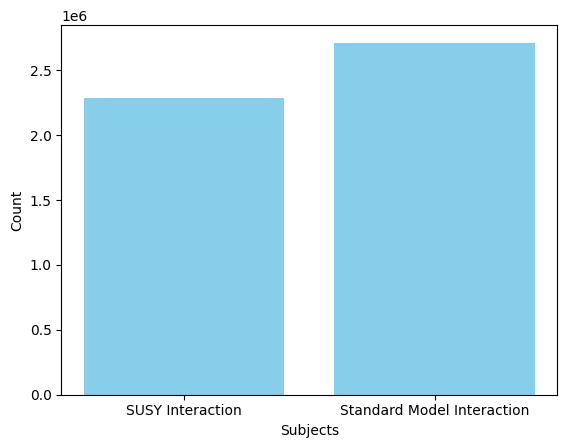

2287827
2712173


In [ ]:
#Print out the bar plot
categories =
values =
plt.bar(categories, values, color = 'skyblue')
plt.xlabel("Subjects")
plt.ylabel("Count")
plt.show()

#Print out the number for each category
print(len(df[df["SUSY"] == 1]))
print(len(df[df["SUSY"] == 0]))

Do you think that is a major data imbalance?

## Cursory Plots of Features of Data Labels

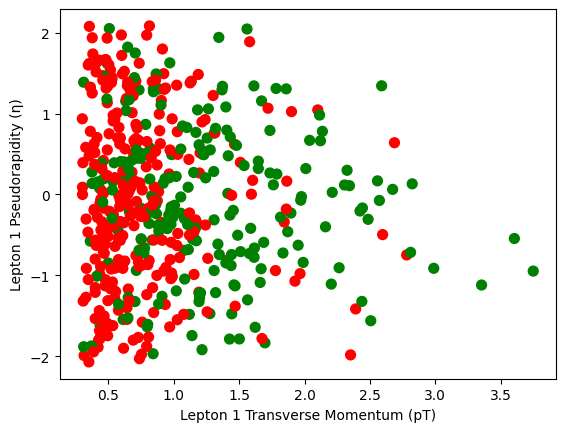

In [ ]:
#Generate a plot between Lepton 1 Pseudorapiditiy (n) vs Lepton 1 Transverse Momentum (pT)

fig, ax = plt.subplots()
first40 = df.head(500)

ax.scatter(first40["lepton 1 pT"], first40["lepton 1 eta"],
           s=50, c=first40["SUSY"].map({0:"red", 1:"green"}))

ax.set_xlabel("Lepton 1 Transverse Momentum (pT)")
ax.set_ylabel("Lepton 1 Pseudorapidity (η)")
plt.show()


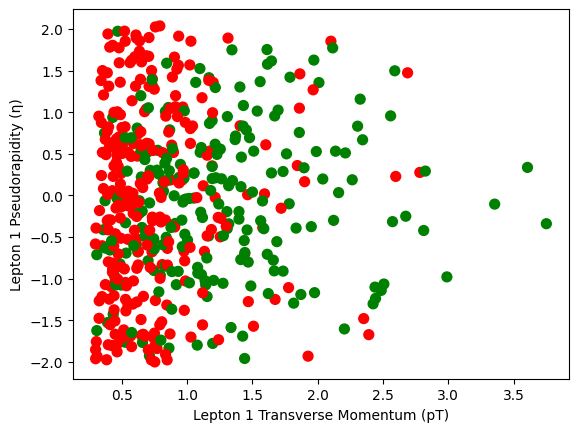

In [ ]:
#Generate a plot between Lepton 1 Transverse Momentum vs Lepton 2 eta

fig, ax = plt.subplots()
first40 = df.head(500)

ax.scatter(first40["lepton 1 pT"], first40["lepton 2 eta"],
           s=50, c=first40["SUSY"].map({0:"red", 1:"green"}))

ax.set_xlabel("Lepton 1 Transverse Momentum (pT)")
ax.set_ylabel("Lepton 2 Pseudorapidity (η)")
plt.show()


# Set a Baseline

Pick your favorite non-neural network method to do classification. I would suggest a non-linear supervised method

### Train_Test_Split

In [ ]:
#Train test split your dataset
#Seperate your dataset
X, y = df.drop(columns = "SUSY"), df["SUSY"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Print out the shape of your datasets
print(x_train.shape)
print(x_test.shape)

(4000000, 18)
(1000000, 18)


### Train/Fit Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'sag')

model.fit(x_train, y_train)

### Predict and Evaluate Model

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1: {f1}")


print("Training:")
ConfusionMatrixDisplay.from_estimator(model, x_train, y_train, cmap='Blues')
plt.show()
print("Testing:")
ConfusionMatrixDisplay.from_estimator(model, x_test, y_test, cmap='Blues')
plt.show()

Accuracy: 0.787966
Recall: 0.6760502391455059
Precision: 0.8286827170786499
F1: 0.7446253459651253


Let's see if Neural Networks can improve upon the accuracy of your non-neural network method

# Structure of the Procedure

* ***step 1:*** Load and process the data
* ***step 2:*** Define the model and its architecture
* ***step 3:*** Choose the optimizer and the cost function
* ***step 4:*** Train the model
* ***step 5:*** Evaluate the model performance on the *unseen* test data
* ***step 6:*** Modify the hyperparameters to optimize performance for the specific data set

## Step 1: DataLoader

DataLoader is used to be able to train a model in batches. Instead of a single epoch training the model on the entire dataset, you can train in batches, sometimes it is too computationally heavy.

I want you to also keep track of what potential hyperparameters are. Since in this notebook we will be going through a grid search and finding the "Best" hyperparamters.

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch

In [ ]:
df.size

95000000

In [ ]:
features = ['SUSY','lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi',
'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2',
'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

low_features = ['lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi',
      'missing energy magnitude', 'missing energy phi']

high_features = ['MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2','S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

class SUSYDataset(Dataset):
    def __init__(self, dataframe, dataset_size, train = True, high_level_features = None):

      #
      self.X = dataframe.drop(columns=["SUSY"])
      self.y = dataframe["SUSY"]

      if high_level_features is None:
        print("Using both high and low level features")

      elif high_level_features is True:
        self.X = self.X[high_features]
        print("Using only high level features")

      elif high_level_features is False:
        self.X = self.X[low_features]
        print("Using only low level features")

      self.X = self.X.iloc[:dataset_size]
      self.y = self.y.iloc[:dataset_size]

      x_train, x_test, y_train, y_test = train_test_split(self.X, self.y, test_size = 0.2, random_state = 42)

      #
      if train:
        self.X = torch.tensor(x_train.values, dtype = torch.float32)
        self.y = torch.tensor(y_train.values, dtype = torch.float32)
      else:
        self.X = torch.tensor(x_test.values, dtype = torch.float32)
        self.y = torch.tensor(y_test.values, dtype = torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        features = self.X[idx]
        label = self.y[idx]
        return features, label

The Dataset Class has three methods you have to implement because they are abstract methods. The __len__ function, the __getitem__ function, and the constructor. I guess you don't have to use constructor but you would just be instantiating an abstract class which shouldn't happen.

In [ ]:
train_loader = DataLoader(SUSYDataset(df, dataset_size = 1000, high_level_features = True), batch_size = 32)
test_loader = DataLoader(SUSYDataset(df, dataset_size = 1000, train = False, high_level_features = True), batch_size = 32)

Using only high level features
Using only high level features


## Step 2: Define the Neural Net and its Architecture

I want you to create a neural network using nn.Sequential.

Then instead of using we will use the forward funciton for wiring.

In [ ]:
import torch.nn as nn

class neuralNetwork(nn.Module):
  """
  Attributes:
  -------------------
  network: nn.Sequential
        - nn.Linear (input -> 200 hidden units)
        - ReLU activation
        - Dropout
        - Linear (200 -> 100)
        - ReLU activation
        - Dropout
        - Linear (100 -> 2)
        - Softmax (over 2 output classes)
  """
  def __init__(self, high_level_feats = None):
    super().__init__()

    if high_level_feats is None:
        fc1 = nn.Linear(18, 200) # all features
    elif high_level_feats:
        fc1 = nn.Linear(10, 200) # low-level only
    else:
        fc1 = nn.Linear(8, 200) # high-level only

    self.network = nn.Sequential(
        fc1,
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(200,100),
        nn.ReLU(),
        nn.Dropout(),
        nn.Linear(100,1),
        nn.Sigmoid()
    )

  def forward(self, x):
    '''Defines the feed-forward function for the NN.

        A backward function is automatically defined using `torch.autograd`

        Parameters
        ----------
        x : autograd.Tensor
            input data

        Returns
        -------
        autograd.Tensor
            output layer of NN

    '''

    return self.network(x)

Now since you are desgning your custom neural network you can define the attributes.

The only thing that matters for designing your neural network is defining

1.   Initialization/Constructor
2.   Forward Propagation Function



In [ ]:
class model(nn.Module):
  """
  Attributes:
  fc1: nn.Linear(input, 200 hidden units)
  fc2: nn.Linear(200, 100)
  fc3: nn.Linear(100, 2)
  """

  def __init__(self,high_level_feats=None):
        # inherit attributes and methods of nn.Module
        super().__init__()

        # an affine operation: y = Wx + b
        if high_level_feats is None:
            self.fc1 = nn.Linear(18, 200) # all features
        elif high_level_feats:
            self.fc1 = nn.Linear(10, 200) # low-level only
        else:
            self.fc1 = nn.Linear(8, 200) # high-level only

        self.fc2 = nn.Linear(200, 100) # see forward function for dimensions
        self.fc3 = nn.Linear(100, 1)

  def forward(self, x):
        '''Defines the feed-forward function for the NN.

        A backward function is automatically defined using `torch.autograd`

        Parameters
        ----------
        x : autograd.Tensor
            input data

        Returns
        -------
        autograd.Tensor
            output layer of NN

        '''

        # apply rectified linear unit
        x = F.relu(self.fc1(x))
        # apply dropout
        x = F.dropout(x, training=self.training)


        # apply rectified linear unit
        x = F.relu(self.fc2(x))

        # apply dropout
        x = F.dropout(x, training=self.training)

        # apply affine operation fc2
        x = self.fc3(x)

        # soft-max layer
        x = F.sigmoid(x)

        return x

Both ways of defining your model architecture is correct.

One way defines the layers as attributes and the other defines it within the forward function.

Whichever fancies your boat really

##3+4 Define Loss and Train

In [ ]:
import torch.optim as optim # different update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc

neural = neuralNetwork(high_level_feats=True)
criterion = torch.nn.BCELoss()
optimizer = optim.SGD(neural.parameters(), lr = 1e-2, momentum = 1e-2)

In [ ]:
neural.train()
EPOCHS = 1000
for epoch in range(EPOCHS):
    epoch_loss= 0

    for batch_idx, (data, label) in enumerate(train_loader):
      optimizer.zero_grad()
      # compute output of final layer: forward step
      output = neural(data)

      # compute loss
      loss = criterion(output.squeeze(-1), label)
      # run backprop: backward step
      loss.backward()
      # update weigths of NN
      optimizer.step()
      epoch_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS}, Avg Loss: {epoch_loss/len(train_loader):.6f}")



Epoch 1/1000, Avg Loss: 0.698766
Epoch 2/1000, Avg Loss: 0.694184
Epoch 3/1000, Avg Loss: 0.688569
Epoch 4/1000, Avg Loss: 0.684350
Epoch 5/1000, Avg Loss: 0.683088
Epoch 6/1000, Avg Loss: 0.676888
Epoch 7/1000, Avg Loss: 0.677396
Epoch 8/1000, Avg Loss: 0.677199
Epoch 9/1000, Avg Loss: 0.676351
Epoch 10/1000, Avg Loss: 0.666492
Epoch 11/1000, Avg Loss: 0.669959
Epoch 12/1000, Avg Loss: 0.658393
Epoch 13/1000, Avg Loss: 0.666937
Epoch 14/1000, Avg Loss: 0.661160
Epoch 15/1000, Avg Loss: 0.662103
Epoch 16/1000, Avg Loss: 0.653938
Epoch 17/1000, Avg Loss: 0.653906
Epoch 18/1000, Avg Loss: 0.645869
Epoch 19/1000, Avg Loss: 0.650201
Epoch 20/1000, Avg Loss: 0.643136
Epoch 21/1000, Avg Loss: 0.635023
Epoch 22/1000, Avg Loss: 0.646115
Epoch 23/1000, Avg Loss: 0.647083
Epoch 24/1000, Avg Loss: 0.637963
Epoch 25/1000, Avg Loss: 0.636119
Epoch 26/1000, Avg Loss: 0.633751
Epoch 27/1000, Avg Loss: 0.628281
Epoch 28/1000, Avg Loss: 0.630618
Epoch 29/1000, Avg Loss: 0.616979
Epoch 30/1000, Avg Loss

## 5: OOD Testing

0.37529465556144714
0.5642585158348083
0.443740576505661
0.5023646354675293
0.3681742250919342
0.43666642904281616
0.5517821311950684
Avg test loss: 0.452551


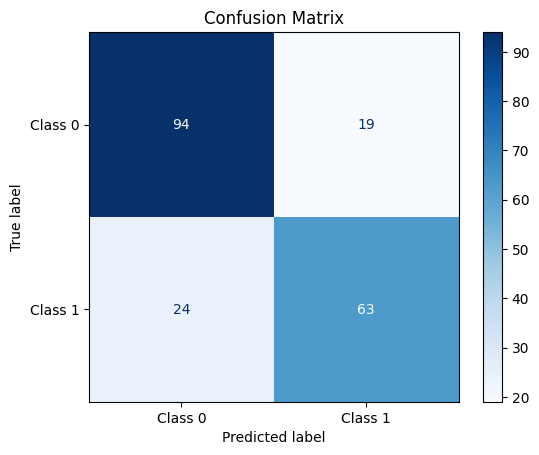

Accuracy: 78.50%


In [ ]:
neural.eval()

test_loss = 0.0
all_preds = []
all_labels = []

with torch.no_grad():
    for data, label in test_loader:
        output = neural(data).squeeze(-1)
        batch_loss = criterion(output, label.float())
        test_loss += batch_loss.item() * data.size(0)

        # predictions: threshold directly
        pred = (output > 0.5).long()                                # int for CM

        all_preds.extend(pred.cpu().tolist())
        all_labels.extend(label.cpu().tolist())

        print(batch_loss.item())

avg_loss = test_loss / len(test_loader.dataset)
print(f"Avg test loss: {avg_loss:.6f}")

# confusion matrix
cm = confusion_matrix(all_labels, all_preds, labels=[0, 1])
ConfusionMatrixDisplay(cm, display_labels=["Class 0", "Class 1"]).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# optional accuracy
acc = (cm.trace() / cm.sum()) * 100
print(f"Accuracy: {acc:.2f}%")


Let's now find do a hyperparameter grid search. Hopefully you found some hyperparameters you were trying to optimize for

In [ ]:
BATCH = 256
EPOCHS = 5                       # keep small per size; increase if you like
LR = 1e-3
SIZES = [1_000, 5_000, 10_000, 50_000]

results = {}

for size in SIZES:
    print(f"\n=== dataset_size = {size} ===")
    # datasets & loaders
    train_ds = SUSYDataset(df, dataset_size=size, train=True,  high_level_features=None)
    test_ds  = SUSYDataset(df, dataset_size=size, train=False, high_level_features=None)

    train_loader = DataLoader(train_ds, batch_size=BATCH, shuffle=True, drop_last=False)
    test_loader  = DataLoader(test_ds,  batch_size=BATCH, shuffle=False, drop_last=False)

    # model / opt / loss (binary head with BCELoss → model must end with Sigmoid)
    neural = neuralNetwork()                 # your model class with final Sigmoid()
    optimizer = torch.optim.Adam(neural.parameters(), lr=LR)
    criterion = torch.nn.BCELoss()

    # ----- train -----
    neural.train()
    for epoch in range(EPOCHS):
        for data, label in train_loader:
            optimizer.zero_grad()
            out = neural(data).squeeze(-1)        # probs in [0,1]
            loss = criterion(out, label.float())
            loss.backward()
            optimizer.step()

    # ----- eval -----
    neural.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    all_probs = []
    all_labels = []
    with torch.no_grad():
        for data, label in test_loader:
            out = neural(data).squeeze(-1)        # probs already
            test_loss += criterion(out, label.float()).item() * data.size(0)
            pred = (out > 0.5)                    # bool
            correct += (pred == label.bool()).sum().item()
            total += label.size(0)
            all_probs.extend(out.cpu().numpy().tolist())
            all_labels.extend(label.cpu().numpy().tolist())

    avg_loss = test_loss / total
    acc = correct / total
    cm = confusion_matrix(all_labels, np.array(all_probs) > 0.5, labels=[0,1])

    results[size] = dict(loss=avg_loss, accuracy=acc, cm=cm)
    print(f"Avg loss: {avg_loss:.4f}  Accuracy: {acc*100:.2f}%")
    print(f"Confusion matrix:\n{cm}")


=== dataset_size = 1000 ===
Using both high and low level features
Using both high and low level features
Avg loss: 0.6165  Accuracy: 81.50%
Confusion matrix:
[[95 18]
 [19 68]]

=== dataset_size = 5000 ===
Using both high and low level features
Using both high and low level features
Avg loss: 0.4732  Accuracy: 78.80%
Confusion matrix:
[[517  63]
 [149 271]]

=== dataset_size = 10000 ===
Using both high and low level features
Using both high and low level features
Avg loss: 0.4568  Accuracy: 79.70%
Confusion matrix:
[[894 154]
 [252 700]]

=== dataset_size = 50000 ===
Using both high and low level features
Using both high and low level features
Avg loss: 0.4374  Accuracy: 80.02%
Confusion matrix:
[[4671  743]
 [1255 3331]]


### Step 6: Modify the Hyperparameters to Optimize Performance of the Model


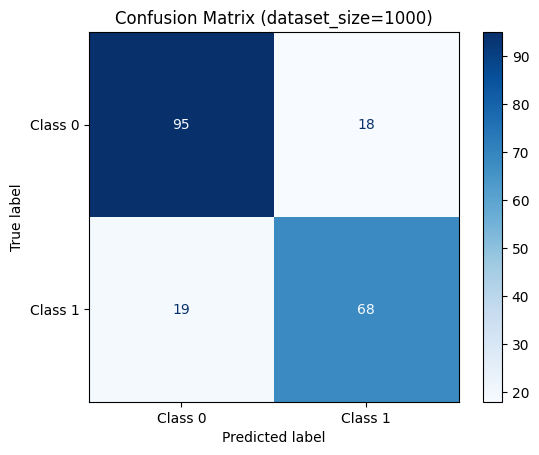

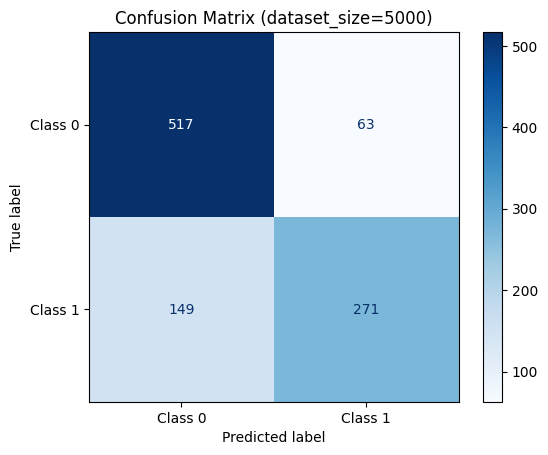

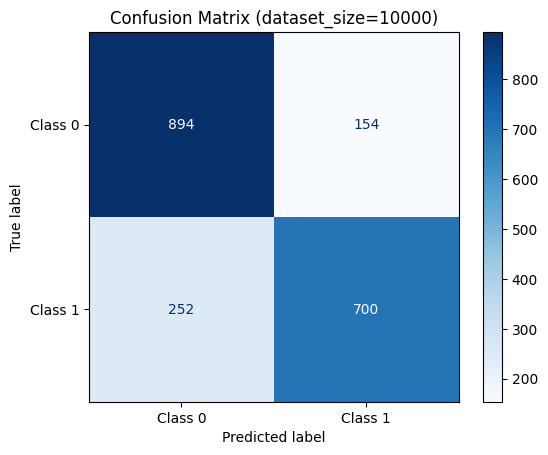

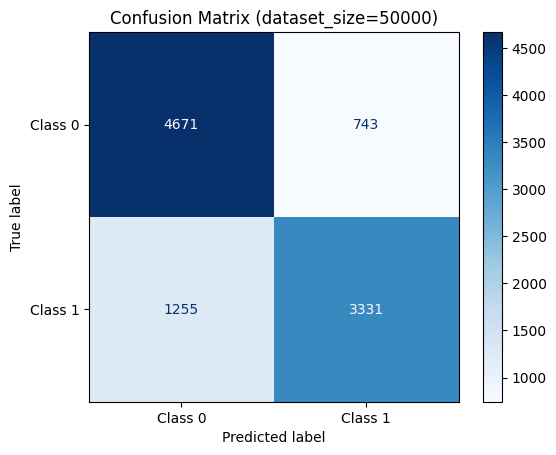

In [ ]:
for size, res in results.items():
    cm = res["cm"]

    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=["Class 0", "Class 1"]
    )
    disp.plot(cmap=plt.cm.Blues, values_format="d")
    plt.title(f"Confusion Matrix (dataset_size={size})")
    plt.show()

In [ ]:
from tqdm import tqdm

# --- config ---
LR_GRID   = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
EPOCHS    = 100
BATCH     = 256
DEVICE    = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Build your datasets/loaders ONCE (reuse across LRs)
train_ds = SUSYDataset(df, dataset_size=50_000, train=True,  high_level_features=None)
test_ds  = SUSYDataset(df, dataset_size=50_000, train=False, high_level_features=None)
train_loader = DataLoader(train_ds, batch_size=BATCH, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=BATCH, shuffle=False)

# Replace with your model (must end with Sigmoid for BCELoss)
def train_one_lr(lr):
    model = neuralNetwork()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = torch.nn.BCELoss()

    # --- train ---
    model.train()
    for _ in tqdm(range(EPOCHS)):
        for data, labels in train_loader:
            data, labels = data.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            probs = model(data).squeeze(-1)         # already in [0,1]
            loss  = criterion(probs, labels.float())
            loss.backward()
            optimizer.step()

    # --- eval ---
    model.eval()
    test_loss, correct, total = 0.0, 0, 0
    all_probs, all_labels = [], []
    with torch.no_grad():
        for data, labels in test_loader:
            data, labels = data.to(DEVICE), labels.to(DEVICE)
            probs = model(data).squeeze(-1)
            test_loss += criterion(probs, labels.float()).item() * data.size(0)
            preds = (probs > 0.5)
            correct += (preds == labels.bool()).sum().item()
            total += labels.size(0)
            all_probs.extend(probs.detach().cpu().numpy().tolist())
            all_labels.extend(labels.detach().cpu().numpy().tolist())

    avg_loss = test_loss / total

    cm = confusion_matrix(all_labels, np.array(all_probs) > 0.5, labels=[0,1])

    return {"loss": avg_loss, "acc": acc, "cm": cm}

# --- run grid ---
results = {}
for lr in LR_GRID:
    print(f"\n=== LR = {lr:g} ===")
    res = train_one_lr(lr)
    results[lr] = res
    print(f"Avg loss: {res['loss']:.4f}  Acc: {res['acc']*100:.2f}%")
    print(res["cm"])


=== Size 1000, LR 0.0001 ===
Using both high and low level features
Using both high and low level features
Loss 0.6915, Acc 54.00%, AUC 0.428
=== Size 1000, LR 0.0003 ===
Using both high and low level features
Using both high and low level features
Loss 0.6719, Acc 72.50%, AUC 0.777
=== Size 1000, LR 0.001 ===
Using both high and low level features
Using both high and low level features
Loss 0.6163, Acc 77.50%, AUC 0.840
=== Size 1000, LR 0.003 ===
Using both high and low level features
Using both high and low level features
Loss 0.4743, Acc 81.00%, AUC 0.870
=== Size 1000, LR 0.01 ===
Using both high and low level features
Using both high and low level features
Loss 0.4491, Acc 78.50%, AUC 0.875
=== Size 2000, LR 0.0001 ===
Using both high and low level features
Using both high and low level features
Loss 0.6803, Acc 55.25%, AUC 0.716
=== Size 2000, LR 0.0003 ===
Using both high and low level features
Using both high and low level features
Loss 0.6428, Acc 69.00%, AUC 0.773
=== Size 2

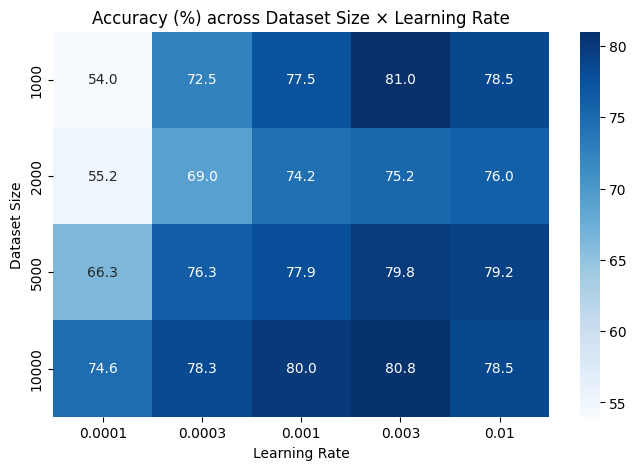

In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- configs ---
DATASET_SIZES = [1000, 2000, 5000, 10000]
LR_GRID       = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2]
EPOCHS        = 5
BATCH         = 256
DEVICE        = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Replace with your model (must output probs in [0,1] for BCELoss)


def run_one(size, lr):
    # Build dataset for this size
    train_ds = SUSYDataset(df, dataset_size=size, train=True,  high_level_features=None)
    test_ds  = SUSYDataset(df, dataset_size=size, train=False, high_level_features=None)

    train_loader = DataLoader(train_ds, batch_size=BATCH, shuffle=True)
    test_loader  = DataLoader(test_ds,  batch_size=BATCH, shuffle=False)

    model = neuralNetwork()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = torch.nn.BCELoss()

    # --- training ---
    model.train()
    for _ in range(EPOCHS):
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            optimizer.zero_grad()
            probs = model(xb).squeeze(-1)
            loss  = criterion(probs, yb.float())
            loss.backward()
            optimizer.step()

    # --- evaluation ---
    model.eval()
    test_loss, correct, total = 0.0, 0, 0
    all_probs, all_labels = [], []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            probs = model(xb).squeeze(-1)
            test_loss += criterion(probs, yb.float()).item() * xb.size(0)
            preds = (probs > 0.5)
            correct += (preds == yb.bool()).sum().item()
            total += yb.size(0)
            all_probs.extend(probs.detach().cpu().numpy().tolist())
            all_labels.extend(yb.detach().cpu().numpy().tolist())

    avg_loss = test_loss / total
    acc = correct / total
    try:
        auc = roc_auc_score(all_labels, all_probs)
    except ValueError:
        auc = float("nan")

    return avg_loss, acc, auc

# --- grid search ---
results = {}
for size in DATASET_SIZES:
    for lr in LR_GRID:
        print(f"=== Size {size}, LR {lr:g} ===")
        loss, acc, auc = run_one(size, lr)
        results[(size, lr)] = {"loss": loss, "acc": acc, "auc": auc}
        print(f"Loss {loss:.4f}, Acc {acc*100:.2f}%, AUC {auc:.3f}")

# --- make heatmap of accuracy ---
acc_matrix = np.zeros((len(DATASET_SIZES), len(LR_GRID)))
for i, size in enumerate(DATASET_SIZES):
    for j, lr in enumerate(LR_GRID):
        acc_matrix[i, j] = results[(size, lr)]["acc"] * 100  # percentage

plt.figure(figsize=(8,5))
sns.heatmap(acc_matrix, annot=True, fmt=".1f", xticklabels=LR_GRID, yticklabels=DATASET_SIZES, cmap="Blues")
plt.xlabel("Learning Rate")
plt.ylabel("Dataset Size")
plt.title("Accuracy (%) across Dataset Size × Learning Rate")
plt.show()


# Do you think this is truly OOD?

=== Size 1000, LR 0.0001 ===
Using only high level features
Using only high level features
Loss 0.6655, Acc 73.50%, AUC 0.820
=== Size 1000, LR 0.0003 ===
Using only high level features
Using only high level features
Loss 0.6746, Acc 66.00%, AUC 0.803
=== Size 1000, LR 0.001 ===
Using only high level features
Using only high level features
Loss 0.6206, Acc 75.00%, AUC 0.826
=== Size 1000, LR 0.003 ===
Using only high level features
Using only high level features
Loss 0.5080, Acc 77.50%, AUC 0.824
=== Size 1000, LR 0.01 ===
Using only high level features
Using only high level features
Loss 0.5225, Acc 74.00%, AUC 0.827
=== Size 2000, LR 0.0001 ===
Using only high level features
Using only high level features
Loss 0.6721, Acc 70.75%, AUC 0.762
=== Size 2000, LR 0.0003 ===
Using only high level features
Using only high level features
Loss 0.6550, Acc 65.00%, AUC 0.761
=== Size 2000, LR 0.001 ===
Using only high level features
Using only high level features
Loss 0.5829, Acc 70.75%, AUC 0.7

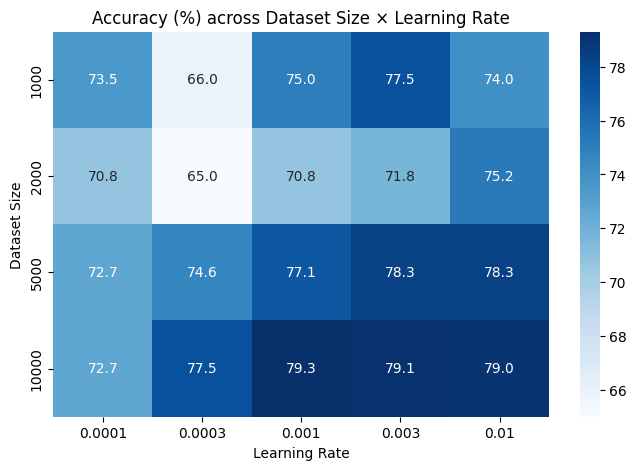

In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- configs ---
DATASET_SIZES = [1000, 2000, 5000, 10000]
LR_GRID       = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2]
EPOCHS        = 5
BATCH         = 256
DEVICE        = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Replace with your model (must output probs in [0,1] for BCELoss)
def build_model():
    return neuralNetwork(high_level_feats=True)   # <--- your class constructor

def run_one(size, lr):
    # Build dataset for this size
    train_ds = SUSYDataset(df, dataset_size=size, train=True,  high_level_features=True)
    test_ds  = SUSYDataset(df, dataset_size=size, train=False, high_level_features=True)
    train_loader = DataLoader(train_ds, batch_size=BATCH, shuffle=True)
    test_loader  = DataLoader(test_ds,  batch_size=BATCH, shuffle=False)

    model = build_model().to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = torch.nn.BCELoss()

    # --- training ---
    model.train()
    for _ in range(EPOCHS):
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            optimizer.zero_grad()
            probs = model(xb).squeeze(-1)
            loss  = criterion(probs, yb.float())
            loss.backward()
            optimizer.step()

    # --- evaluation ---
    model.eval()
    test_loss, correct, total = 0.0, 0, 0
    all_probs, all_labels = [], []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            probs = model(xb).squeeze(-1)
            test_loss += criterion(probs, yb.float()).item() * xb.size(0)
            preds = (probs > 0.5)
            correct += (preds == yb.bool()).sum().item()
            total += yb.size(0)
            all_probs.extend(probs.detach().cpu().numpy().tolist())
            all_labels.extend(yb.detach().cpu().numpy().tolist())

    avg_loss = test_loss / total
    acc = correct / total
    try:
        auc = roc_auc_score(all_labels, all_probs)
    except ValueError:
        auc = float("nan")

    return avg_loss, acc, auc

# --- grid search ---
results = {}
for size in DATASET_SIZES:
    for lr in LR_GRID:
        print(f"=== Size {size}, LR {lr:g} ===")
        loss, acc, auc = run_one(size, lr)
        results[(size, lr)] = {"loss": loss, "acc": acc, "auc": auc}
        print(f"Loss {loss:.4f}, Acc {acc*100:.2f}%, AUC {auc:.3f}")

# --- make heatmap of accuracy ---
acc_matrix = np.zeros((len(DATASET_SIZES), len(LR_GRID)))
for i, size in enumerate(DATASET_SIZES):
    for j, lr in enumerate(LR_GRID):
        acc_matrix[i, j] = results[(size, lr)]["acc"] * 100  # percentage

plt.figure(figsize=(8,5))
sns.heatmap(acc_matrix, annot=True, fmt=".1f", xticklabels=LR_GRID, yticklabels=DATASET_SIZES, cmap="Blues")
plt.xlabel("Learning Rate")
plt.ylabel("Dataset Size")
plt.title("Accuracy (%) across Dataset Size × Learning Rate")
plt.show()


=== Size 1000, LR 0.0001 ===
Using only low level features
Using only low level features
Loss 0.6864, Acc 55.00%, AUC 0.683
=== Size 1000, LR 0.0003 ===
Using only low level features
Using only low level features
Loss 0.6627, Acc 73.00%, AUC 0.821
=== Size 1000, LR 0.001 ===
Using only low level features
Using only low level features
Loss 0.6048, Acc 73.00%, AUC 0.828
=== Size 1000, LR 0.003 ===
Using only low level features
Using only low level features
Loss 0.4774, Acc 77.00%, AUC 0.846
=== Size 1000, LR 0.01 ===
Using only low level features
Using only low level features
Loss 0.4883, Acc 75.00%, AUC 0.821
=== Size 2000, LR 0.0001 ===
Using only low level features
Using only low level features
Loss 0.6780, Acc 66.75%, AUC 0.704
=== Size 2000, LR 0.0003 ===
Using only low level features
Using only low level features
Loss 0.6438, Acc 69.25%, AUC 0.775
=== Size 2000, LR 0.001 ===
Using only low level features
Using only low level features
Loss 0.5320, Acc 74.50%, AUC 0.819
=== Size 2000

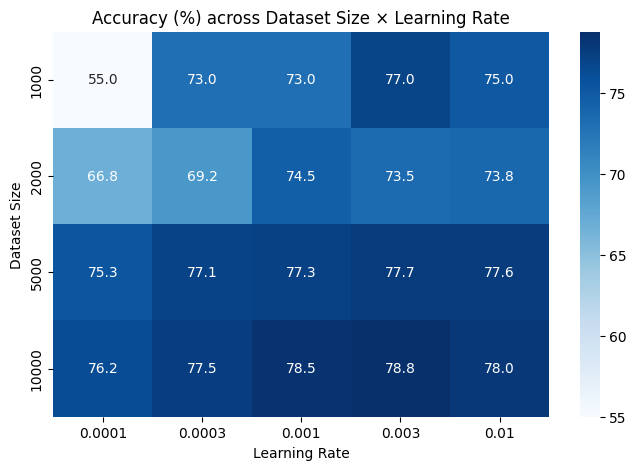

In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- configs ---
DATASET_SIZES = [1000, 2000, 5000, 10000]
LR_GRID       = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2]
EPOCHS        = 5
BATCH         = 256
DEVICE        = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Replace with your model (must output probs in [0,1] for BCELoss)
def build_model():
    return neuralNetwork(high_level_feats=False)   # <--- your class constructor

def run_one(size, lr):
    # Build dataset for this size
    train_ds = SUSYDataset(df, dataset_size=size, train=True,  high_level_features=False)
    test_ds  = SUSYDataset(df, dataset_size=size, train=False, high_level_features=False)
    train_loader = DataLoader(train_ds, batch_size=BATCH, shuffle=True)
    test_loader  = DataLoader(test_ds,  batch_size=BATCH, shuffle=False)

    model = build_model().to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = torch.nn.BCELoss()

    # --- training ---
    model.train()
    for _ in range(EPOCHS):
        for xb, yb in train_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            optimizer.zero_grad()
            probs = model(xb).squeeze(-1)
            loss  = criterion(probs, yb.float())
            loss.backward()
            optimizer.step()

    # --- evaluation ---
    model.eval()
    test_loss, correct, total = 0.0, 0, 0
    all_probs, all_labels = [], []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(DEVICE), yb.to(DEVICE)
            probs = model(xb).squeeze(-1)
            test_loss += criterion(probs, yb.float()).item() * xb.size(0)
            preds = (probs > 0.5)
            correct += (preds == yb.bool()).sum().item()
            total += yb.size(0)
            all_probs.extend(probs.detach().cpu().numpy().tolist())
            all_labels.extend(yb.detach().cpu().numpy().tolist())

    avg_loss = test_loss / total
    acc = correct / total
    try:
        auc = roc_auc_score(all_labels, all_probs)
    except ValueError:
        auc = float("nan")

    return avg_loss, acc, auc

# --- grid search ---
results = {}
for size in DATASET_SIZES:
    for lr in LR_GRID:
        print(f"=== Size {size}, LR {lr:g} ===")
        loss, acc, auc = run_one(size, lr)
        results[(size, lr)] = {"loss": loss, "acc": acc, "auc": auc}
        print(f"Loss {loss:.4f}, Acc {acc*100:.2f}%, AUC {auc:.3f}")

# --- make heatmap of accuracy ---
acc_matrix = np.zeros((len(DATASET_SIZES), len(LR_GRID)))
for i, size in enumerate(DATASET_SIZES):
    for j, lr in enumerate(LR_GRID):
        acc_matrix[i, j] = results[(size, lr)]["acc"] * 100  # percentage

plt.figure(figsize=(8,5))
sns.heatmap(acc_matrix, annot=True, fmt=".1f", xticklabels=LR_GRID, yticklabels=DATASET_SIZES, cmap="Blues")
plt.xlabel("Learning Rate")
plt.ylabel("Dataset Size")
plt.title("Accuracy (%) across Dataset Size × Learning Rate")
plt.show()


# What do you think should be critical